In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

pd.set_option('display.width', 100)
pd.set_option('precision', 3)

PROJ_ROOT=os.path.abspath(os.path.join(os.pardir))
%matplotlib inline

In [2]:
sys.path.append(os.path.join(PROJ_ROOT, 'src'))
from data.preprocess import read_raw_data, read_config


In [4]:
raw_data_filename = os.path.join(PROJ_ROOT, 'data', 'raw', 'pima.csv')
PARAMS = os.path.join(PROJ_ROOT, 'data', 'params.yml')

In [5]:
config = read_config(PARAMS)

In [6]:
feature_cols = config['feature_cols']
response_col = config['response_col']
header = feature_cols + response_col

In [8]:
df = read_raw_data(raw_data_filename)
df.columns = header

# Overview of the data

In [9]:
print(df.head(20))

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

# Data dimensions
Shape and data type

In [10]:
print(df.shape)

(768, 9)


In [11]:
print(df.dtypes)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


# Descriptive Stats
Look for presence of NA values

In [18]:
print(df.describe())

          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000


# Correlated features
Using heatmap and pair plot/ scatter plot

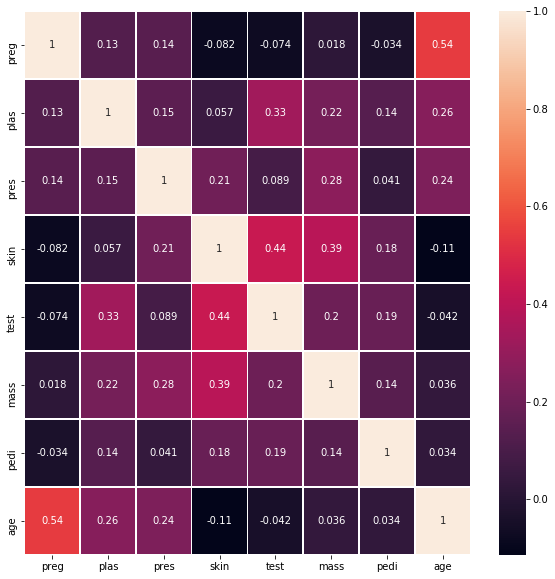

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[feature_cols].corr(), annot=True, linewidths=.5, ax=ax)

/Users/spica/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


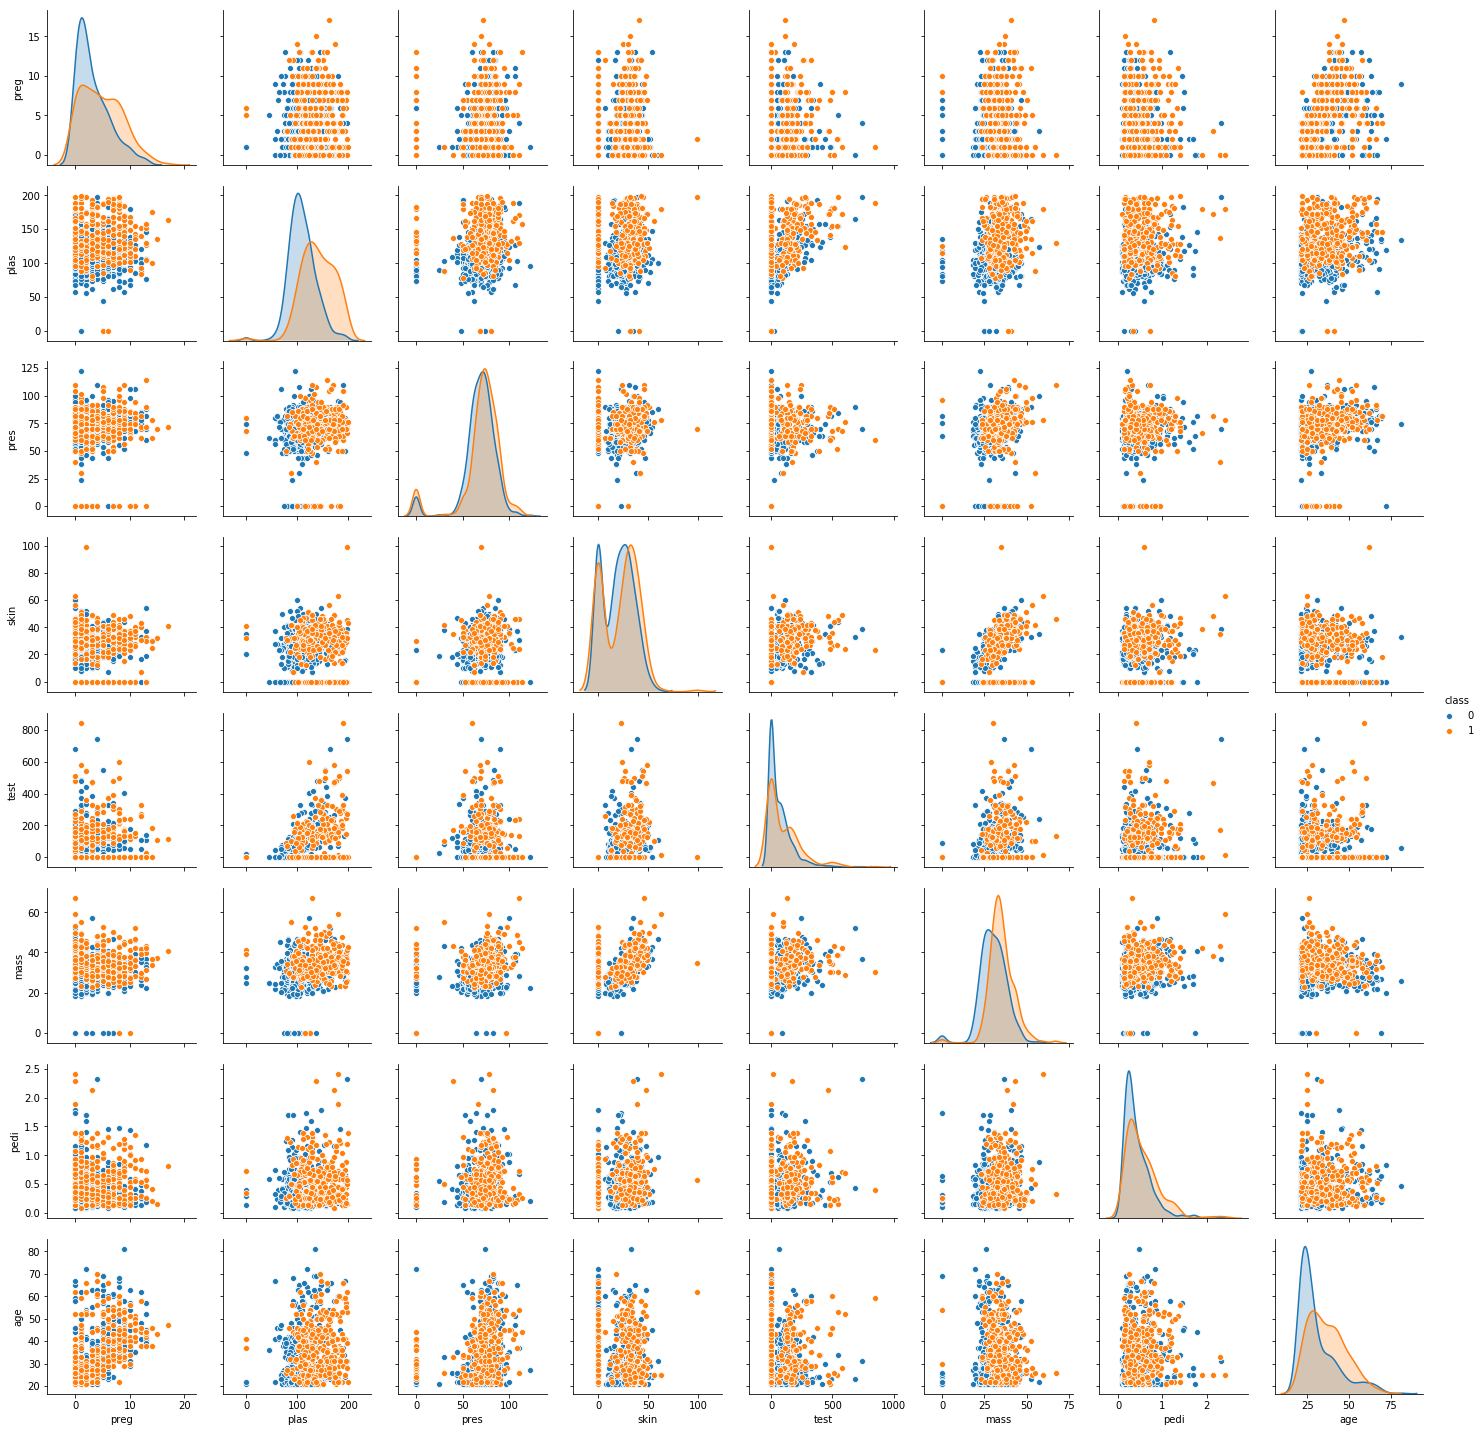

In [13]:
sns.pairplot(df, vars=feature_cols, hue=''.join(response_col))

# Classification Distribution (Classification Only)

In [14]:
print(df.groupby(by='class').size())

class
0    500
1    268
dtype: int64


# Univariate distributions
Check for Gaussian distributions as ML algorithms assume them to be normally distributed

## Histogram

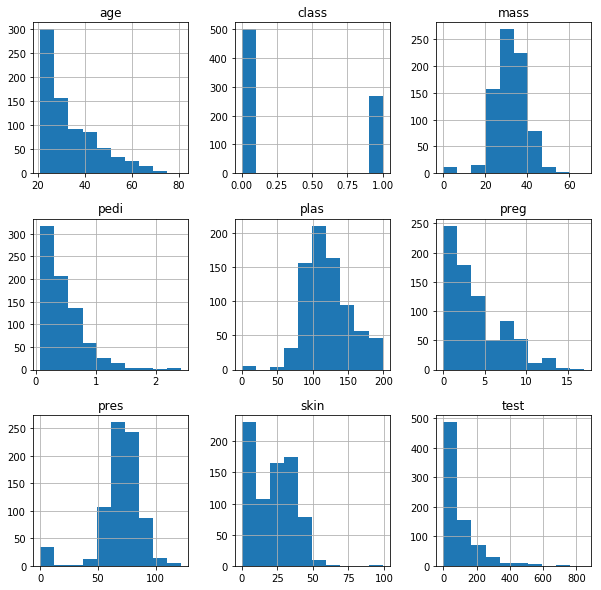

In [15]:
df.hist(figsize=(10,10))
plt.show()
# plt.savefig('hist.png')

## Density Plot [Preferred]

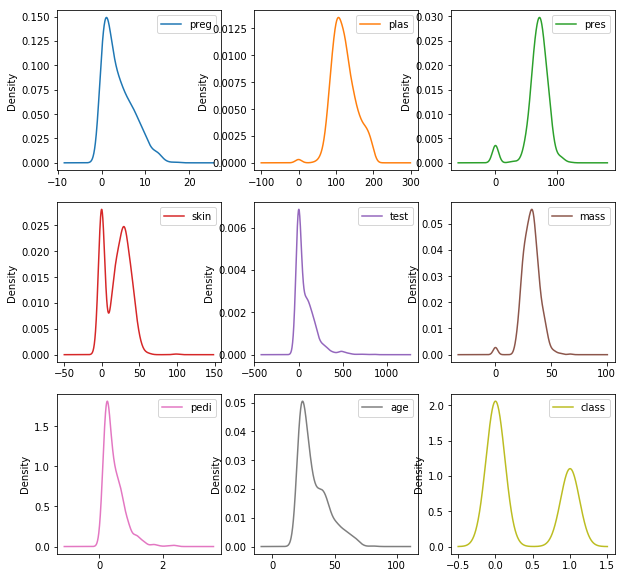

In [16]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(10,10))
plt.show()

In [ ]:
# Skewness - Postive (right), Negative (left), Close to zero (less skew)
print(df.skew())

# Box and Whisker
If data is numeric, box and whisker plot gives a clearer view of the distribution of the features

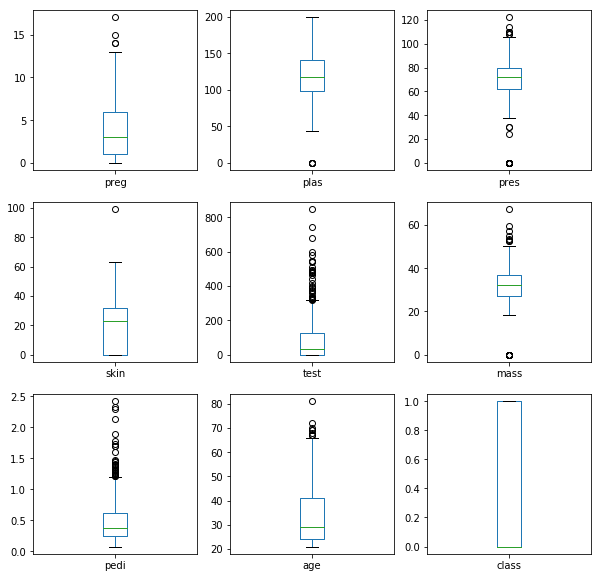

In [17]:
df.plot(kind='box', subplots=True, sharex=False, layout=(3,3), sharey=False, figsize=(10,10))
plt.show()